In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import io
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
car_df = pd.read_csv('Car_Crash.csv').drop('Unnamed: 0',axis=1)

In [ ]:
car_df.shape

(11217, 15)

In [ ]:
car_df.head(20)

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
5,25-39,12.383,Not_Survived,none,belted,0,f,77,1997,1992.0,unavail,pass,0,4.0,4:96:2
6,55+,13.374,Not_Survived,none,none,0,m,34,1997,1990.0,unavail,driver,0,4.0,4:100:1
7,10-24,13.374,Not_Survived,airbag,belted,1,m,37,1997,1995.0,deploy,driver,1,4.0,4:104:2
8,40-54,13.374,Not_Survived,none,none,0,f,33,1997,1987.0,unavail,driver,0,4.0,4:138:1
9,25-39,15.355,Not_Survived,airbag,none,1,f,84,1997,1996.0,deploy,driver,1,4.0,4:146:1


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
car_df.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [ ]:
car_df['injSeverity'].value_counts()

3.0    3337
0.0    2734
1.0    2218
2.0    1682
4.0    1101
5.0      68
Name: injSeverity, dtype: int64

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
car_df['injSeverity'].fillna(car_df['injSeverity'].mode()[0], inplace= True)

In [ ]:
dups = car_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

car_df[dups]

Number of duplicate rows = 0


,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid


In [ ]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11217.0,1.833645,1.377214,0.0,1.000,2.000,3.000,5.00


In [ ]:
car_df.groupby(["Survived"]).count()

,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
Survived,,,,,,,,,,,,,,
Not_Survived,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180
survived,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037


In [ ]:
car_df.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [ ]:
car_df['dvcat'].unique()

array([4, 2, 1, 3, 0])

In [ ]:
car_df['dvcat'] = car_df['dvcat'].replace(['1-9km/h'], ['1-9'])

In [ ]:
car_df['dvcat'].unique()

array([4, 2, 1, 3, 0])

In [ ]:
car_df['Survived'].unique()

array([0, 1])

In [ ]:
car_df['Survived'].replace({'survived': 1,'Not_Survived': 0}, inplace = True)

In [ ]:
car_df['airbag'].unique()

array([1, 0])

In [ ]:
car_df['airbag'].replace({'none': 1, 'airbag': 0}, inplace= True)

In [ ]:
car_df['seatbelt'].unique()

array([1, 0])

In [ ]:
car_df['seatbelt'].replace({'none': 1, 'belted': 0}, inplace= True)

In [ ]:
car_df['sex'].unique()

array([1, 0])

In [ ]:
car_df['sex'].replace({'m': 1, 'f': 0}, inplace= True)

In [ ]:
car_df['abcat'].unique()

array([2, 1, 0])

In [ ]:
car_df['occRole'].unique()

array([1, 0])

In [ ]:
car_df['occRole'].replace({'driver': 1, 'pass': 0}, inplace= True)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int64  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int64  
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
car_df['dvcat']=le.fit_transform(car_df['dvcat'])

In [ ]:
car_df['abcat']=le.fit_transform(car_df['abcat'])

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int64  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int64  
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [3]:
car_df.drop(['caseid'],axis = 1,inplace= True)

In [ ]:
car_df.corr()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
dvcat,1.000000,-0.145590,-0.415593,0.160533,0.205410,0.051341,0.075768,-0.033358,-0.233494,-0.166158,0.057847,0.015879,0.055622,0.469143
weight,-0.145590,1.000000,0.091640,0.003574,-0.078739,0.000659,-0.006471,-0.040111,0.056892,-0.015226,0.038795,0.000219,-0.065783,-0.220659
Survived,-0.415593,0.091640,1.000000,-0.139679,-0.206467,0.107990,-0.046499,-0.135473,0.549885,0.165096,-0.107829,0.023460,0.054346,-0.517637
airbag,0.160533,0.003574,-0.139679,1.000000,0.157501,0.050272,0.092886,-0.025109,-0.181478,-0.766181,0.896724,-0.086011,-0.611983,0.124394
seatbelt,0.205410,-0.078739,-0.206467,0.157501,1.000000,0.066590,0.117071,-0.066066,-0.149208,-0.180534,0.111991,-0.047712,-0.044132,0.283063
frontal,0.051341,0.000659,0.107990,0.050272,0.066590,1.000000,0.055639,-0.048856,0.059768,-0.024267,-0.117856,0.033721,0.260388,-0.053709
sex,0.075768,-0.006471,-0.046499,0.092886,0.117071,0.055639,1.000000,-0.063575,-0.025957,-0.097390,0.071708,0.116228,-0.036143,-0.021284
ageOFocc,-0.033358,-0.040111,-0.135473,-0.025109,-0.066066,-0.048856,-0.063575,1.000000,-0.072271,-0.002070,-0.008569,0.052485,-0.009556,0.123495
yearacc,-0.233494,0.056892,0.549885,-0.181478,-0.149208,0.059768,-0.025957,-0.072271,1.000000,0.247743,-0.151650,0.018217,0.091252,-0.300495
yearVeh,-0.166158,-0.015226,0.165096,-0.766181,-0.180534,-0.024267,-0.097390,-0.002070,0.247743,1.000000,-0.677852,0.018416,0.452448,-0.138475


<Axes: >

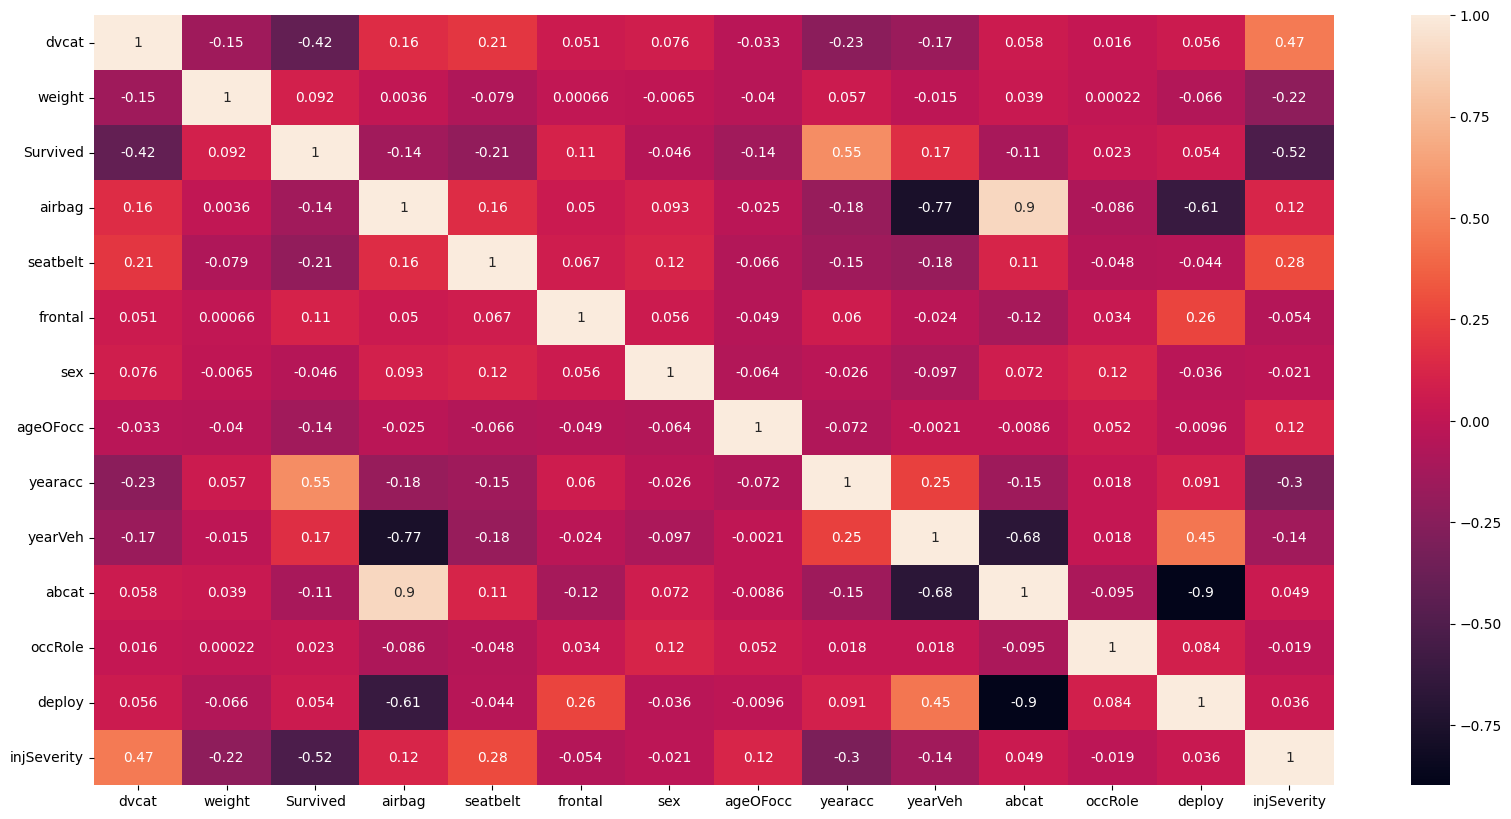

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(car_df.corr(),annot = True)

<Axes: xlabel='dvcat', ylabel='count'>

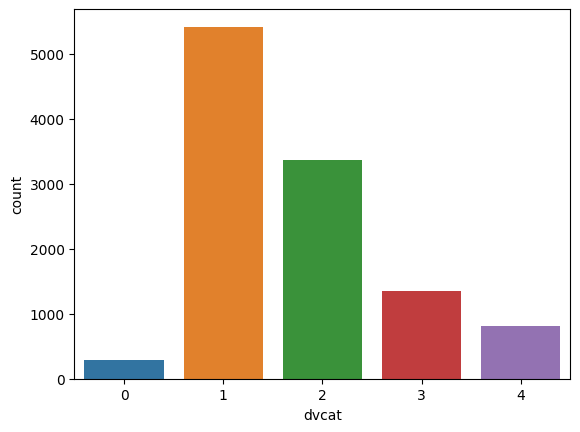

In [ ]:
sns.countplot(x= car_df["dvcat"])

<Axes: xlabel='airbag', ylabel='count'>

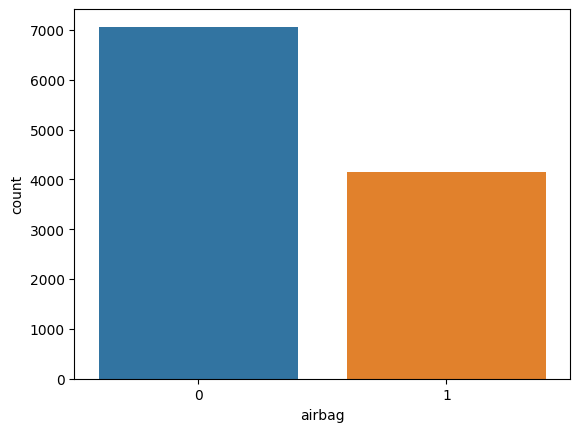

In [ ]:
sns.countplot(x= car_df["airbag"])

<Axes: xlabel='seatbelt', ylabel='count'>

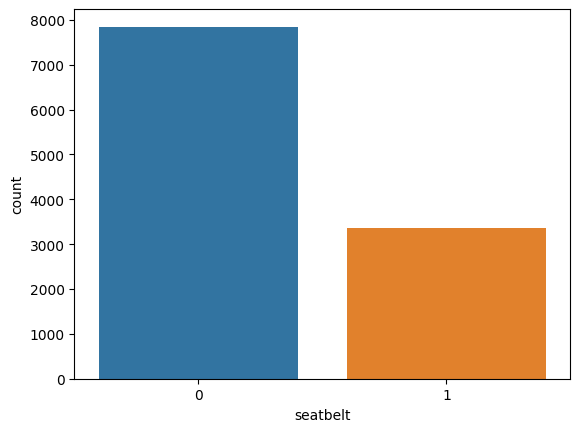

In [ ]:
sns.countplot(x= car_df["seatbelt"])

<Axes: xlabel='frontal', ylabel='count'>

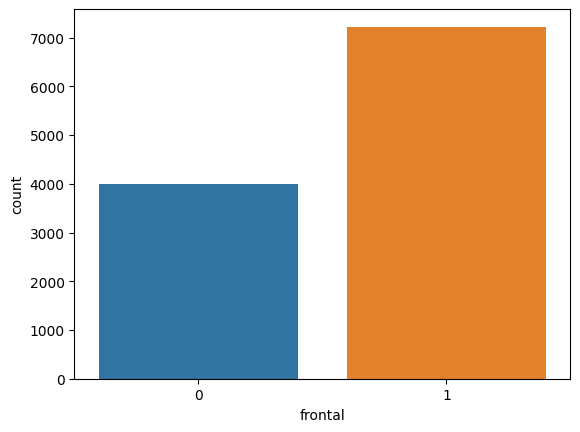

In [ ]:
sns.countplot(x= car_df["frontal"])

<Axes: xlabel='sex', ylabel='count'>

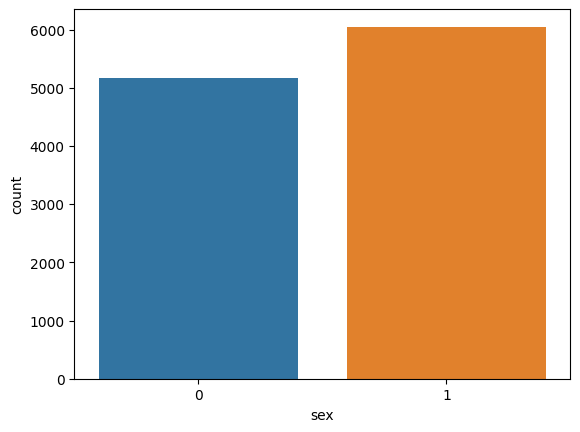

In [ ]:
sns.countplot(x= car_df["sex"])

<Axes: xlabel='deploy', ylabel='count'>

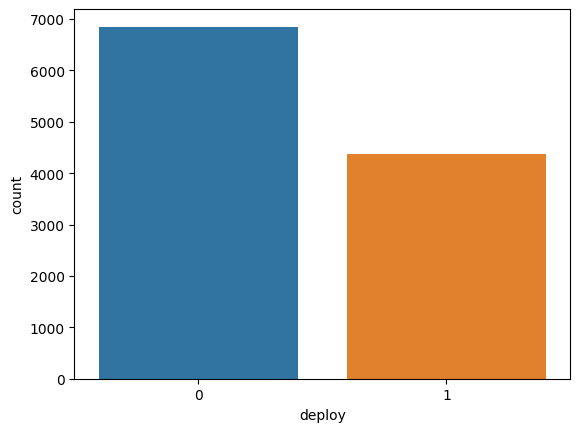

In [ ]:
sns.countplot(x= car_df["deploy"])

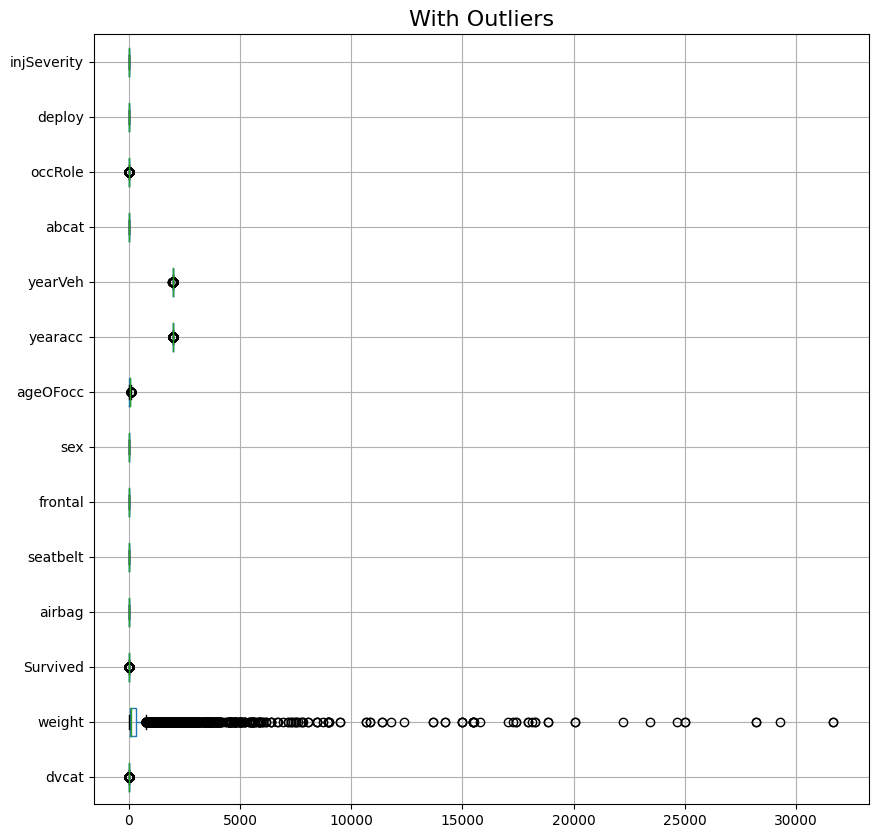

In [ ]:
cont = car_df.dtypes[(car_df.dtypes!='uint8') & (car_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
car_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in car_df[cont].columns:
    lr,ur=remove_outlier(car_df[column])
    car_df[column]=np.where(car_df[column]>ur,ur,car_df[column])
    car_df[column]=np.where(car_df[column]<lr,lr,car_df[column])

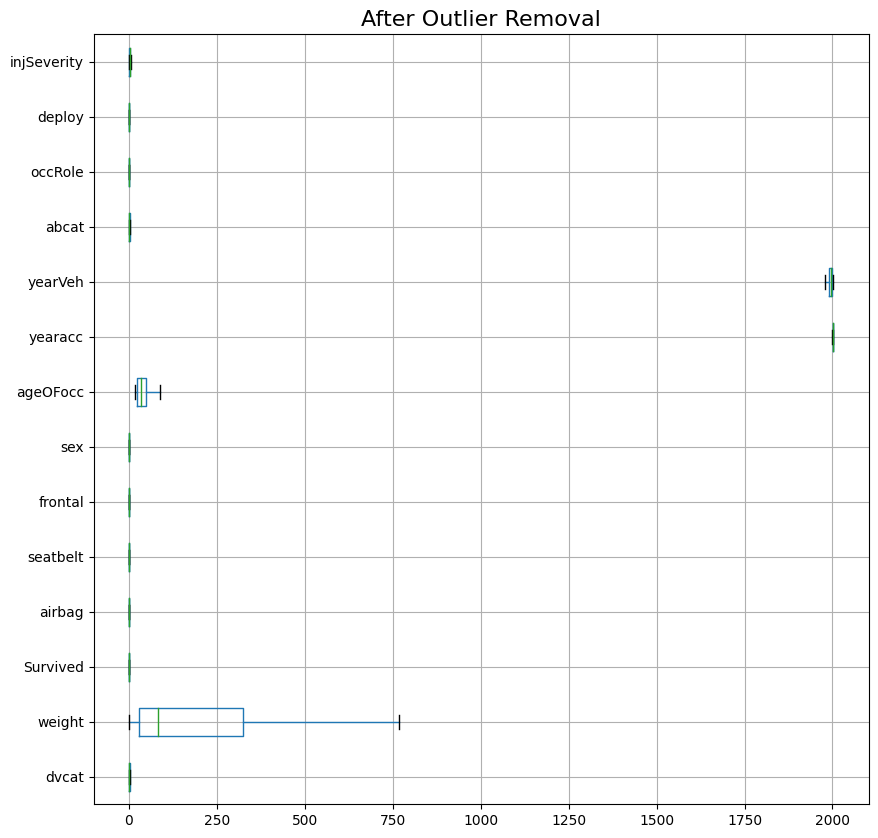

In [ ]:
plt.figure(figsize=(10,10))
car_df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [ ]:
car_df.columns

Index(['dvcat', 'weight', 'Survived', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity'],
      dtype='object')

In [ ]:
np.isinf(car_df).sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int64  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int64  
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [ ]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
dvcat,11217.0,1.731122,0.958810,0.0,1.000,1.000,2.000,4.00
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217.0,0.894803,0.306821,0.0,1.000,1.000,1.000,1.00
airbag,11217.0,0.370242,0.482891,0.0,0.000,0.000,1.000,1.00
seatbelt,11217.0,0.300259,0.458391,0.0,0.000,0.000,1.000,1.00
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
sex,11217.0,0.539182,0.498485,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00


In [ ]:
car_df.skew()

dvcat           0.878264
weight         11.115386
Survived       -2.573960
airbag          0.537519
seatbelt        0.871645
frontal        -0.601667
sex            -0.157231
ageOFocc        0.911059
yearacc        -1.671687
yearVeh        -1.026743
abcat           0.036515
occRole        -1.375262
deploy          0.454813
injSeverity     0.021729
dtype: float64

In [ ]:
X = car_df.drop(["Survived"], axis=1)
y = car_df[["Survived"]]

In [ ]:
X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
X.shape

(11217, 14)

In [ ]:
y.shape

(11217, 1)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int64  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int64  
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [ ]:
print(X_train.head())

       const  dvcat    weight  airbag  seatbelt  frontal  sex  ageOFocc  \
6057     1.0      2    45.575       1         0        1    0        37   
8164     1.0      3    84.013       1         0        1    0        26   
6693     1.0      3    18.171       0         0        1    1        41   
10667    1.0      1  1491.848       0         1        0    1        89   
1317     1.0      1     9.829       0         0        1    0        21   

       yearacc  yearVeh  abcat  occRole  deploy  injSeverity  
6057      2001   1993.0      2        1       0          3.0  
8164      2002   1988.0      2        0       0          3.0  
6693      2002   1999.0      0        1       1          2.0  
10667     2002   1990.0      0        1       1          2.0  
1317      2000   1996.0      0        1       1          0.0  


In [ ]:
print(X_test.head())

       const  dvcat   weight  airbag  seatbelt  frontal  sex  ageOFocc  \
3555     1.0      1  126.138       1         0        1    1        22   
4485     1.0      3   80.230       1         0        0    0        88   
7670     1.0      1  760.901       0         0        0    0        25   
10516    1.0      1   77.793       0         0        1    1        36   
5812     1.0      1   64.863       1         1        0    1        40   

       yearacc  yearVeh  abcat  occRole  deploy  injSeverity  
3555      2001   1981.0      2        1       0          5.0  
4485      2001   1989.0      2        1       0          4.0  
7670      2002   1992.0      1        1       0          0.0  
10516     2002   1999.0      1        1       0          1.0  
5812      2001   1993.0      2        1       0          3.0  


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.9812834224598931


In [ ]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[ 337   46]
 [  22 2961]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       383
           1       0.98      0.99      0.99      2983

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



In [ ]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,8.562699e-01,0.143730
1,9.614820e-01,0.038518
2,8.407186e-10,1.000000
3,2.418578e-07,1.000000
4,2.753127e-02,0.972469


In [ ]:
model.score(X_train, y_train)

0.9810215259202649

AUC: 0.992


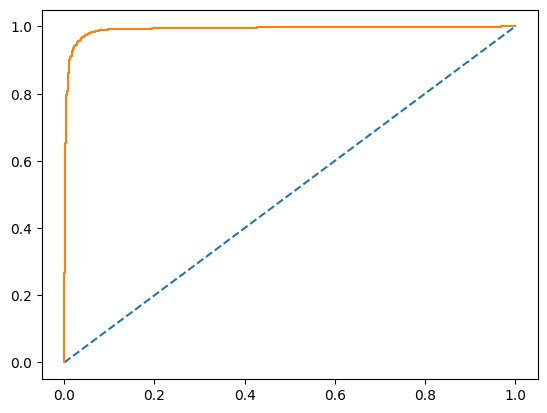

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
model.score(X_test, y_test)

0.9795008912655971

AUC: 0.992


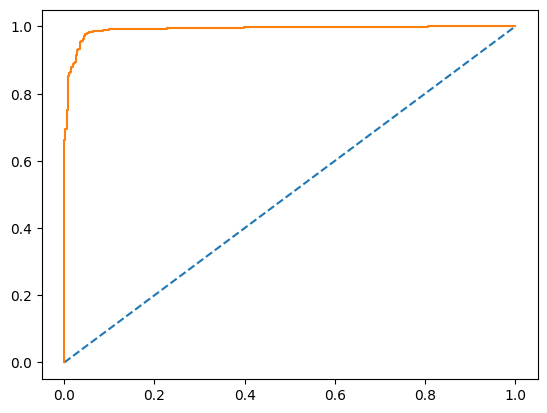

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[ 704,   93],
       [  56, 6998]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       797
           1       0.99      0.99      0.99      7054

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[ 339,   44],
       [  25, 2958]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       383
           1       0.99      0.99      0.99      2983

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



In [ ]:
## Applying GridSearchCV for Logistic Regression

In [ ]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [ ]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
#Prediction on training set

In [ ]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,9.378999e-01,0.062100
1,9.791000e-01,0.020900
2,4.176963e-10,1.000000
3,6.128291e-07,0.999999
4,6.200158e-02,0.937998


In [ ]:
## Confusion matrix on the training data

confusion_matrix(y_train, ytrain_predict)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       797
           1       0.99      0.99      0.99      7054

    accuracy                           0.98      7851
   macro avg       0.95      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851
 



In [ ]:
## Confusion matrix on the test data

confusion_matrix(y_test,ytest_predict)
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       383
           1       0.98      0.99      0.99      2983

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366
 



In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [ ]:
tn,fp,fn,tp

(337, 46, 22, 2961)

In [ ]:
(tp+tn)/(tp+tn+fp+fn)# ACCURACY of predicting 0's and 1's correctly

0.9797979797979798

In [ ]:
tp/(tp+fp)#Precision for 1's

0.9847023611572996

In [ ]:
tp/(tp+fn)#Recall for 1's

0.9926248742876299

In [ ]:
# Applying Standard Scaler to scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [ ]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

# Training Data and Test Data Confusion Matrix Comparison

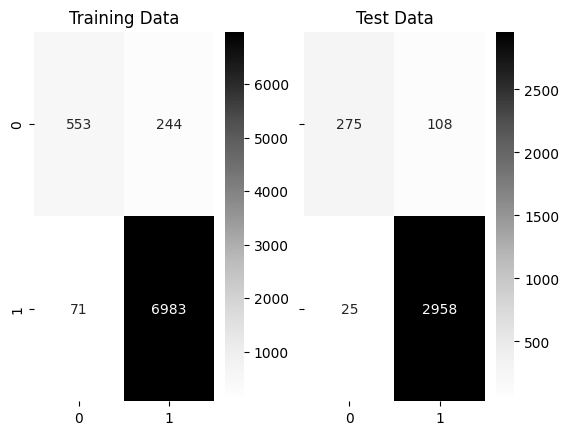

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Training Data and Test Data Classification Report Comparison

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.69      0.78       797
           1       0.97      0.99      0.98      7054

    accuracy                           0.96      7851
   macro avg       0.93      0.84      0.88      7851
weighted avg       0.96      0.96      0.96      7851
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.92      0.72      0.81       383
           1       0.96      0.99      0.98      2983

    accuracy                           0.96      3366
   macro avg       0.94      0.85      0.89      3366
weighted avg       0.96      0.96      0.96      3366
 



In [ ]:
pred_train = model.predict(X_train)
#The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

1


In [ ]:
pred_test = model.predict(X_test)
#The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test)

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

1


In [ ]:
pred_prob_test = model.predict_proba(X_test)
prob = pd.DataFrame(pred_prob_test[:,1])
pred = np.where(prob>0.20, 1, 0)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77       383
           1       0.95      1.00      0.98      2983

    accuracy                           0.96      3366
   macro avg       0.97      0.81      0.87      3366
weighted avg       0.96      0.96      0.95      3366



In [ ]:
pred_prob_test = model.predict_proba(X_test)
prob = pd.DataFrame(pred_prob_test[:,1])
pred = np.where(prob>0.17, 1, 0)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       383
           1       0.95      1.00      0.98      2983

    accuracy                           0.96      3366
   macro avg       0.97      0.81      0.87      3366
weighted avg       0.96      0.96      0.95      3366



# Probability prediction for the training and test data

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.968
AUC for the Test Data: 0.966


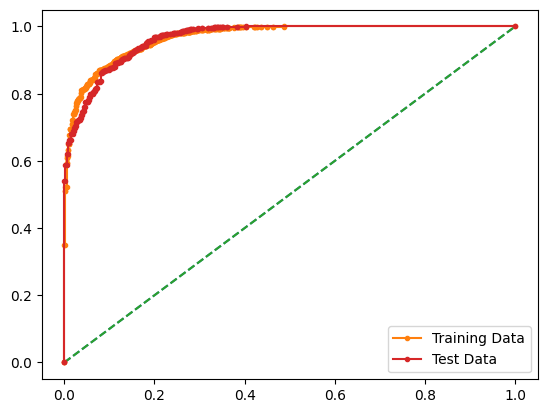

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
pred_prob_train[:,1]

array([0.98973437, 0.99767266, 0.99867209, ..., 0.99944054, 0.99643755,
       0.10504056])

# Generate Coefficients and intercept for the Linear Discriminant Function

In [ ]:
#intercept value
clf.intercept_

array([5.99310266])

In [ ]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[ 0.        , -1.17882309, -0.18210877,  0.04308371, -0.20807087,
         0.4593997 , -0.21481736, -0.50919161,  2.49745078, -0.1376967 ,
        -0.04282506,  0.04127923,  0.1180156 , -1.81412319]])

In [ ]:
X.columns

Index(['const', 'dvcat', 'weight', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity'],
      dtype='object')

In [ ]:
a=clf.coef_
np.round(a,2) # rounded up coefficients

array([[ 0.  , -1.18, -0.18,  0.04, -0.21,  0.46, -0.21, -0.51,  2.5 ,
        -0.14, -0.04,  0.04,  0.12, -1.81]])

# <font color='red'>Using LDA for Dimensionality Reduction</font>

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components = 1) # as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_test_lda = lda_model.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(7851, 1)
(3366, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.72      0.80       383
           1       0.97      0.99      0.98      2983

    accuracy                           0.96      3366
   macro avg       0.94      0.86      0.89      3366
weighted avg       0.96      0.96      0.96      3366
 

